<h1 align='center'>TITANIC <h1>

The RMS Titanic left Southampton, England on April 10, 1912 to start her maiden voyage to New York. The Titanic was considered to be the largest ship during that time with a length of 882.75 feet. She accommodated the wealthy elite through the comfort of luxury while the immigrants were packed into the steerage.
The Titanic was advertised to be "unsinkable" and named as one of the safest ship ever built and this was why she only carried 20 lifeboats. The number of lifeboats that the Titanic carried was enough for only 1/3 of the 2,200 passengers and crews on board. It was thought that since the Titanic was deemed to be “unsinkable”, the lifeboats were only useful to rescue survivors from other sinking ships. Also, the lifeboats were said to take up a lot of deck space.

After four days of travelling at sea, she met a catastrophic incident at 11:40pm during a calm night. The RMS Titanic struck an iceberg. The sound of impact was described as “the tearing of calico, nothing more." The impact fatally injured the ship and this caused the cold water to rush into the ship, while leaving the Titanic with only a few hours to live.
    The RMS Titanic became one of the most notable steamship in history after it met its unfortunate night on the 15th of April 1912. More than 1,500 lives went down on the ocean floor with the ship that night.

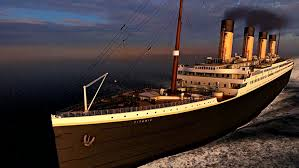

# Breakdown of this notebook:
1.Importing Libraries

2.Loading the dataset-Train and Test

3.Data Cleaning: •Deleting redundant columns.
•Dropping duplicates.
•Cleaning individual columns.
•Remove the NaN values from the dataset
•Find relation between different features and survival

4.Data Visualization: Using plots to find relations between the features.•Get Correlation between different variables

5.Train and Fit the model(1.With the knn model built using titanic dataset p
For mentioned variable. Try running the same model but use pca to select your variables.
We are trying to see if PCA actually help you improve the accuracy of your model or is it just causing over fitting of your model)
2.compare if the method of one hot encoding Vs factorziation,which makes more sense while creating derived variables.

6.Predict the scores using KNearestNeighbors

7.Try running the same model using PCA

8.Check Accuracy and Predict Survival values for test.csv



# Term Explanations

survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat - Lifeboat (if survived)
body - Body number (if did not survive and body was recovered)


In [1]:
# Importing related Python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

# Importing SKLearn clssifiers and libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

C:\Users\Jis.Thomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Importing the training dataset
train=pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test=pd.read_csv("test.csv")

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Feature Engineering

In [6]:
train.shape

(891, 12)

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1)38% out of the training-set survived the Titanic. 
2)passenger ages range from 0.4 to 80. 
3)There are missing values in ‘Age’ feature.

In [9]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Finding and Handling Missing data

In [10]:
total=train.isnull().sum().sort_values(ascending=False)

In [11]:
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

The Embarked feature has only 2 missing values.‘Age’ feature, which has 177 missing values.Its better to drop Cabin, as it has 687 missing values.

# Embarked

In [12]:
#Fill missing value of Embarked with common value
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Fill the missing value of test and train with 'S', the common value

In [13]:
top='S'
df=[train,test]
for data in df:
    data['Embarked']=data['Embarked'].fillna(top)

# Age

In [14]:
#Fill 177 missing values of age with median data
df=[train,test]
for data in df:
    data['Age']=data['Age'].fillna(data['Age'].median())

In [15]:
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


Categorical values: Name, Sex,Ticket, Embarked
Float values: Age, Fare

# Convert Float values to Int

In [17]:
#Fill 0 to NAN and convert to int
df=[train,test]
for data in df:
    data['Fare']=data['Fare'].fillna(0)
    data['Fare']=data['Fare'].astype(int)

# Dropping irrelevant values from Training set

PassengerId,Name and Ticket doesn't have any significance to a person's survival probability. So lets drop it.

In [18]:
train = train.drop(['PassengerId'], axis=1)

In [19]:
train = train.drop(['Name'], axis=1)

In [20]:
train = train.drop(['Ticket'], axis=1)

# Label Encoding for Sex and Embarked

Sex variable values become (1/0) and Single (1/0). Assigning each unique value to a different integer technique is called Label encoding. when we user label encoding we have to convert null values into 0.

In [21]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
df=[train,test]
for data in df:
    data['Sex']=label_encoder.fit_transform(data['Sex'])
    data['Embarked']=label_encoder.fit_transform(data['Embarked'])

There are another two methods to deal with categorical variables, whether to delete the whole column if it does not affect the predictor or to use One-hot encoding to create new columns indicating the presence (or absence) of each possible value in the original data.
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder
result = OneHotEncoder().fit_transform(df['Sex'].reshape(-1, 1)).toarray()

# Appending columns
df[['Female', 'Male']] = pd.DataFrame(result, index = df.index)
# Resulting dataframe
df

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int32
Embarked    891 non-null int64
dtypes: float64(1), int32(1), int64(6)
memory usage: 52.3 KB


# Creating Categories

# Age

In [23]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7,2
1,1,1,0,38.0,1,0,71,0
2,1,3,0,26.0,0,0,7,2
3,1,1,0,35.0,1,0,53,2
4,0,3,1,35.0,0,0,8,2


In [24]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

# Fare

In [25]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [26]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,0,2
1,1,1,0,5,1,0,3,0
2,1,3,0,3,0,0,0,2
3,1,1,0,5,1,0,3,2
4,0,3,1,5,0,0,1,2


# Creating New Features

# Family

In [27]:
data=[train,test]
for dataset in data:
    dataset['Family']=dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['Family']>0,'Family']=0
    dataset.loc[dataset['Family']==0,'Alone']=1
    dataset['Family']=dataset['Family'].astype(int)
    dataset['Alone']=dataset['Alone'].astype(int)

# Fare Per Person

In [28]:
data=[train,test]

for dataset in data:
    dataset['Fare Per Person']=(dataset['Fare'])/(dataset['Family']+1)
    dataset['Fare Per Person']=dataset['Fare Per Person'].astype(int)

In [29]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone,Fare Per Person
0,0,3,1,2,1,0,0,2,0,1,0
1,1,1,0,5,1,0,3,0,0,1,3
2,1,3,0,3,0,0,0,2,0,1,0
3,1,1,0,5,1,0,3,2,0,1,3
4,0,3,1,5,0,0,1,2,0,1,1


In [30]:
test = test.drop(['Name'], axis=1)
test = test.drop(['Ticket'], axis=1)

# Building Machine Learning Models

In [31]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone,Fare Per Person
0,3,1,2,1,0,0,2,0,1,0
1,1,0,5,1,0,3,0,0,1,3
2,3,0,3,0,0,0,2,0,1,0
3,1,0,5,1,0,3,2,0,1,3
4,3,1,5,0,0,1,2,0,1,1


In [32]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone,Fare Per Person
0,3,1,5,0,0,0,1,0,1,0
1,3,0,6,1,0,0,2,0,1,0
2,2,1,6,0,0,1,1,0,1,1
3,3,1,3,0,0,1,2,0,1,1
4,3,0,2,1,1,1,2,0,1,1


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass             891 non-null int64
Sex                891 non-null int64
Age                891 non-null int32
SibSp              891 non-null int64
Parch              891 non-null int64
Fare               891 non-null int32
Embarked           891 non-null int64
Family             891 non-null int32
Alone              891 non-null int32
Fare Per Person    891 non-null int32
dtypes: int32(5), int64(5)
memory usage: 52.3 KB


In [34]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
classifier.score(X_train, Y_train)


0.8462401795735129

In [36]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

# Error Rate

Text(0,0.5,'Error Rate')

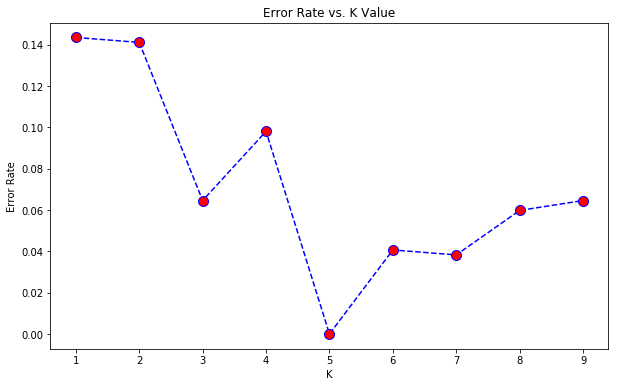

In [37]:
error_rate = [] 

for i in range(1, 10): 
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, Y_train) 
    pred_i = knn.predict(X_test) 
    error_rate.append(np.mean(pred_i != y_pred)) 
  
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 10), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate')

# Making predictions on out-of-sample data

Finally, we can use this model to make predictions on out of sample data. And generate a new data frame ‘submission’.

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId        418 non-null int64
Pclass             418 non-null int64
Sex                418 non-null int64
Age                418 non-null int32
SibSp              418 non-null int64
Parch              418 non-null int64
Fare               418 non-null int32
Embarked           418 non-null int64
Family             418 non-null int32
Alone              418 non-null int32
Fare Per Person    418 non-null int32
dtypes: int32(5), int64(6)
memory usage: 27.8 KB


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived           891 non-null int64
Pclass             891 non-null int64
Sex                891 non-null int64
Age                891 non-null int32
SibSp              891 non-null int64
Parch              891 non-null int64
Fare               891 non-null int32
Embarked           891 non-null int64
Family             891 non-null int32
Alone              891 non-null int32
Fare Per Person    891 non-null int32
dtypes: int32(5), int64(6)
memory usage: 59.2 KB


In [40]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'],'Survived':y_pred})

submission.head()



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [41]:
filename = 'Titanic_Predictions.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic_Predictions.csv


# PCA

In [42]:
# PCA Application
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.39555718 0.34201233]


In [43]:
##Performing Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
#print('Accuracy of LR',mean_squared_error(y_pred,y_true))

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 0 0 0 1 0 0 1 0 0 0]


There are several ways to check your Linear Regression model accuracy. Usually, you may use Root mean squared error. You may train several Linear Regression models, adding or removing features to your dataset, and see which one has the lowest RMSE - the best one in your case. Also try to normalize your data before fitting into Linear Regression model.

The confusion matrix is used to check discrete results, but Linear Regression model returns predicted result as a continuous values. That is why you get the error

# LDA

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
#print('Accuracy of LR',mean_squared_error(y_pred,X_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 0 0 0 1 0 0 1 0 0 0]


# Visualizations

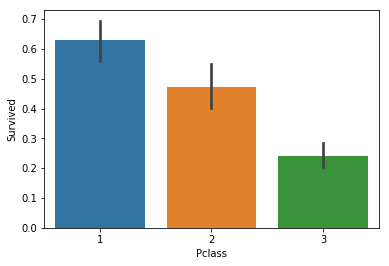

In [45]:
sns.barplot(x='Pclass', y='Survived',data=train)

In [46]:
#Age and Sex

In [47]:
#Survival count with respect to Pclass:

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [48]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [49]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


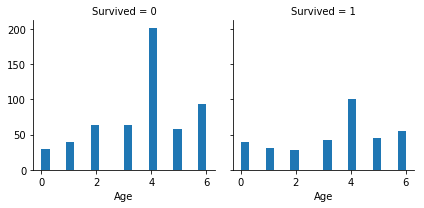

In [50]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

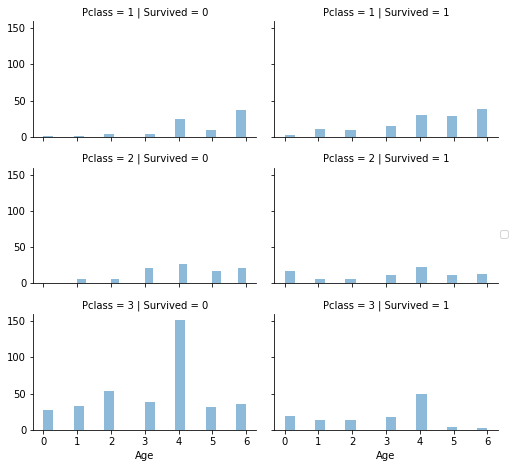

In [51]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Observations:


1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).For males, the survival chances decreases with an increase in age.
2)The oldest Passenger was saved(80 years).Survival chances for Passengers aged 20–50 from Pclass1 is high and is even better for Women.
3)Maximum number of deaths were in the age group of 30–40.Women from Pclass1 is about 95–96%, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate. Passengers Of Class 1 were given a very high priority while rescue. Even though the the number of Passengers in Class 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.
The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18–19%.
